# Techniques d’Intelligence Artificielle - Réseaux de neurones

TANG Kévin p1501263

ENG Charles p1403762

Enseignant : Mathieu Lefort

## I Algorithme

In [ ]:
# coding: utf8
#!/usr/bin/env python
# ------------------------------------------------------------------------
# Carte de Kohonen
# Écrit par Mathieu Lefort
#
# Distribué sous licence BSD.
# ------------------------------------------------------------------------
# Implémentation de l'algorithme des cartes auto-organisatrices de Kohonen
# ------------------------------------------------------------------------
# Pour que les divisions soient toutes réelles (pas de division entière)
from __future__ import division
# Librairie de calcul matriciel
import numpy
# Librairie d'affichage
import matplotlib.pyplot as plt



class Neuron:
  ''' Classe représentant un neurone '''
  
  def __init__(self, w, posx, posy):
    '''
    @summary: Création d'un neurone
    @param w: poids du neurone
    @type w: numpy array
    @param posx: position en x du neurone dans la carte
    @type posx: int
    @param posy: position en y du neurone dans la carte
    @type posy: int
    '''
    # Initialisation des poids
    self.weights = w.flatten()
    # Initialisation de la position
    self.posx = posx
    self.posy = posy
    # Initialisation de la sortie du neurone
    self.y = 0.
  
  def compute(self,x):
    '''
    @summary: Affecte à y la valeur de sortie du neurone (i.e. la distance entre son poids et l'entrée)
    @param x: entrée du neurone
    @type x: numpy array
    '''
    # TODO
    self.y = numpy.linalg.norm(self.weights - x)


  def learn(self,eta,sigma,posxbmu,posybmu,x):
    '''
    @summary: Modifie les poids selon la règle de Kohonen
    @param eta: taux d'apprentissage
    @type eta: float
    @param sigma: largeur du voisinage
    @type sigma: float
    @param posxbmu: position en x du neurone gagnant (i.e. celui dont le poids est le plus proche de l'entrée)
    @type posxbmu: int
    @param posybmu: position en y du neurone gagnant (i.e. celui dont le poids est le plus proche de l'entrée)
    @type posybmu: int
    @param x: entrée du neurone
    @type x: numpy array
    '''
    # TODO (attention à ne pas changer la partie à gauche du =)
    self.weights[:] = self.weights + eta * numpy.exp(-numpy.linalg.norm(((self.posx - posxbmu)**2 + (self.posy - posybmu)**2)) / (2 * sigma**2)) * (x - self.weights)


class SOM:
  ''' Classe implémentant une carte de Kohonen. '''

  def __init__(self, inputsize, gridsize):
    '''
    @summary: Création du réseau
    @param inputsize: taille de l'entrée
    @type inputsize: tuple
    @param gridsize: taille de la carte
    @type gridsize: tuple
    '''
    # Initialisation de la taille de l'entrée
    self.inputsize = inputsize
    # Initialisation de la taille de la carte
    self.gridsize = gridsize
    # Création de la carte
    # Carte de neurones
    self.map = []    
    # Carte des poids
    self.weightsmap = []
    # Carte des activités
    self.activitymap = []
    for posx in range(gridsize[0]):
      mline = []
      wmline = []
      amline = []
      for posy in range(gridsize[1]):
        neuron = Neuron(numpy.random.random(self.inputsize),posx,posy)
        mline.append(neuron)
        wmline.append(neuron.weights)
        amline.append(neuron.y)
      self.map.append(mline)
      self.weightsmap.append(wmline)
      self.activitymap.append(amline)
    self.activitymap = numpy.array(self.activitymap)

  def compute(self,x):
    '''
    @summary: calcule de l'activité des neurones de la carte
    @param x: entrée de la carte (identique pour chaque neurone)
    @type x: numpy array
    '''
    # On demande à chaque neurone de calculer son activité et on met à jour la carte d'activité de la carte
    for posx in range(self.gridsize[0]):
      for posy in range(self.gridsize[1]):
        self.map[posx][posy].compute(x)
        self.activitymap[posx][posy] = self.map[posx][posy].y

  def learn(self,eta,sigma,x):
    '''
    @summary: Modifie les poids de la carte selon la règle de Kohonen
    @param eta: taux d'apprentissage
    @type eta: float
    @param sigma: largeur du voisinage
    @type sigma: float
    @param x: entrée de la carte
    @type x: numpy array
    '''
    # Calcul du neurone vainqueur
    bmux,bmuy = numpy.unravel_index(numpy.argmin(self.activitymap),self.gridsize)
    # Mise à jour des poids de chaque neurone
    for posx in range(self.gridsize[0]):
      for posy in range(self.gridsize[1]):
        self.map[posx][posy].learn(eta,sigma,bmux,bmuy,x)

        
      

  def scatter_plot(self,interactive=False):
    '''
    @summary: Affichage du réseau dans l'espace d'entrée (utilisable dans le cas d'entrée à deux dimensions et d'une carte avec une topologie de grille carrée)
    @param interactive: Indique si l'affichage se fait en mode interactif
    @type interactive: boolean
    '''
    # Création de la figure
    if not interactive:
      plt.figure()
    # Récupération des poids
    w = numpy.array(self.weightsmap)
    # Affichage des poids
    plt.scatter(w[:,:,0].flatten(),w[:,:,1].flatten(),c='k')
    # Affichage de la grille
    for i in range(w.shape[0]):
      plt.plot(w[i,:,0],w[i,:,1],'k',linewidth=1.)
    for i in range(w.shape[1]):
      plt.plot(w[:,i,0],w[:,i,1],'k',linewidth=1.)
    # Modification des limites de l'affichage
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    # Affichage du titre de la figure
    plt.suptitle('Poids dans l\'espace d\'entree')
    # Affichage de la figure
    if not interactive:
      plt.show()

  def scatter_plot_2(self,interactive=False):
    '''
    @summary: Affichage du réseau dans l'espace d'entrée en 2 fois 2d (utilisable dans le cas d'entrée à quatre dimensions et d'une carte avec une topologie de grille carrée)
    @param interactive: Indique si l'affichage se fait en mode interactif
    @type interactive: boolean
    '''
    # Création de la figure
    if not interactive:
      plt.figure()
    # Affichage des 2 premières dimensions dans le plan
    plt.subplot(1,2,1)
    # Récupération des poids
    w = numpy.array(self.weightsmap)
    # Affichage des poids
    plt.scatter(w[:,:,0].flatten(),w[:,:,1].flatten(),c='k')
    # Affichage de la grille
    for i in range(w.shape[0]):
      plt.plot(w[i,:,0],w[i,:,1],'k',linewidth=1.)
    for i in range(w.shape[1]):
      plt.plot(w[:,i,0],w[:,i,1],'k',linewidth=1.)
    # Affichage des 2 dernières dimensions dans le plan
    plt.subplot(1,2,2)
    # Récupération des poids
    w = numpy.array(self.weightsmap)
    # Affichage des poids
    plt.scatter(w[:,:,2].flatten(),w[:,:,3].flatten(),c='k')
    # Affichage de la grille
    for i in range(w.shape[0]):
      plt.plot(w[i,:,2],w[i,:,3],'k',linewidth=1.)
    for i in range(w.shape[1]):
      plt.plot(w[:,i,2],w[:,i,3],'k',linewidth=1.)
    # Affichage du titre de la figure
    plt.suptitle('Poids dans l\'espace d\'entree')
    # Affichage de la figure
    if not interactive:
      plt.show()

  def plot(self):
    '''
    @summary: Affichage des poids du réseau (matrice des poids)
    '''
    # Récupération des poids
    w = numpy.array(self.weightsmap)
    # Création de la figure
    f,a = plt.subplots(w.shape[0],w.shape[1])    
    # Affichage des poids dans un sous graphique (suivant sa position de la SOM)
    for i in range(w.shape[0]):
      for j in range(w.shape[1]):
        plt.subplot(w.shape[0],w.shape[1],i*w.shape[1]+j+1)
        im = plt.imshow(w[i,j].reshape(self.inputsize),interpolation='nearest',vmin=numpy.min(w),vmax=numpy.max(w),cmap='binary')
        plt.xticks([])
        plt.yticks([])
    # Affichage de l'échelle
    f.subplots_adjust(right=0.8)
    cbar_ax = f.add_axes([0.85, 0.15, 0.05, 0.7])
    f.colorbar(im, cax=cbar_ax)
    # Affichage du titre de la figure
    plt.suptitle('Poids dans l\'espace de la carte')
    # Affichage de la figure
    plt.show()

  def MSE(self,X):
    '''
    @summary: Calcul de l'erreur de quantification vectorielle moyenne du réseau sur le jeu de données
    @param X: le jeu de données
    @type X: numpy array
    '''
    # On récupère le nombre d'exemples
    nsamples = X.shape[0]
    # Somme des erreurs quadratiques
    s = 0
    # Pour tous les exemples du jeu de test
    for x in X:
      # On calcule la distance à chaque poids de neurone
      self.compute(x.flatten())
      # On rajoute la distance minimale au carré à la somme
      s += numpy.min(self.activitymap)**2
    # On renvoie l'erreur de quantification vectorielle moyenne
    return s/nsamples

# -----------------------------------------------------------------------------
if __name__ == '__main__':
  # Création d'un réseau avec une entrée (2,1) et une carte (10,10)
  #TODO mettre à jour la taille des données d'entrée pour les données robotiques
  # Valeur par défaut : network = SOM((2,1),(10,10)) 
  network = SOM((2,1),(10,10))
  # network = SOM((2,2),(10,10)) pour données robotiques
  # PARAMÈTRES DU RÉSEAU
  # Taux d'apprentissage
  # Valeur défaut : 0.05
  ETA = 0.05
  # Largeur du voisinage
  # Valeur défaut : 1.4
  SIGMA = 1.4
  # Nombre de pas de temps d'apprentissage
  # Valeur défaut : 30000
  N = 30000
  # Affichage interactif de l'évolution du réseau 
  #TODO à mettre à faux pour que les simulations aillent plus vite
  # Valeur défaut : True
  VERBOSE = True
  # Nombre de pas de temps avant rafraissichement de l'affichage
  # Valeur défaut : 1000
  NAFFICHAGE = 1000
  # DONNÉES D'APPRENTISSAGE
  # Nombre de données à générer pour les ensembles 1, 2 et 3
  # TODO décommenter les données souhaitées
  # Valeur défaut : 1200
  nsamples = 1200
  # Ensemble de données 1
#  samples = numpy.random.random((nsamples,2,1))*2-1
  # Ensemble de données 2
#  samples1 = -numpy.random.random((nsamples//3,2,1))
#  samples2 = numpy.random.random((nsamples//3,2,1))
#  samples2[:,0,:] -= 1
#  samples3 = numpy.random.random((nsamples//3,2,1))
#  samples3[:,1,:] -= 1
#  samples = numpy.concatenate((samples1,samples2,samples3))
  # Ensemble de données 3
  samples1 = numpy.random.random((nsamples//2,2,1))
  samples1[:,0,:] -= 1
  samples2 = numpy.random.random((nsamples//2,2,1))
  samples2[:,1,:] -= 1
  samples = numpy.concatenate((samples1,samples2))
  # Ensemble de données test diagonale
#  samples  = numpy.linspace(-1, 1, nsamples)
  # Ensemble de données test non uniforme
#  samples1 = numpy.random.normal(0, 1, nsamples)
#  samples2 = numpy.random.normal(0, 0.2, nsamples)
#  samples = numpy.column_stack((samples1,samples2))
  # Ensemble de données robotiques
#  samples = numpy.random.random((nsamples,4,1))
#  samples[:,0:2,:] *= numpy.pi
#  l1 = 0.7
#  l2 = 0.3
#  samples[:,2,:] = l1*numpy.cos(samples[:,0,:])+l2*numpy.cos(samples[:,0,:]+samples[:,1,:])
#  samples[:,3,:] = l1*numpy.sin(samples[:,0,:])+l2*numpy.sin(samples[:,0,:]+samples[:,1,:])
  # Affichage des données (pour les ensembles 1, 2 et 3)
  plt.figure()
  plt.scatter(samples[:,0,0], samples[:,1,0])
  plt.xlim(-1,1)
  plt.ylim(-1,1)
  plt.suptitle('Donnees apprentissage')
  plt.show()
  # Affichage des données (test diagonale)
#  plt.figure()
#  plt.scatter(samples[:], samples[:])
#  plt.xlim(-1,1)
#  plt.ylim(-1,1)
#  plt.suptitle('Donnees apprentissage')
#  plt.show()
  # Affichage des données (test données non uniforme)
#  plt.figure()
#  plt.scatter(samples[:, 0], samples[:, 1])
#  plt.xlim(-1, 1)
#  plt.ylim(-1, 1)
#  plt.suptitle('Donnees apprentissage')
#  plt.show()
  # Affichage des données (pour l'ensemble robotique)
#  plt.figure()
#  plt.subplot(1,2,1)
#  plt.scatter(samples[:,0,0].flatten(),samples[:,1,0].flatten(),c='k')
#  plt.subplot(1,2,2)
#  plt.scatter(samples[:,2,0].flatten(),samples[:,3,0].flatten(),c='k')
#  plt.suptitle('Donnees apprentissage')
#  plt.show()
    
  # SIMULATION
  # Affichage des poids du réseau
  network.plot()
  # Initialisation de l'affichage interactif
  if VERBOSE:
    # Création d'une figure
    plt.figure()
    # Mode interactif
    plt.ion()
    # Affichage de la figure
    plt.show()
  # Boucle d'apprentissage
  for i in range(N+1):
    # Choix d'un exemple aléatoire pour l'entrée courante
    index = numpy.random.randint(nsamples)
    x = samples[index].flatten()
    # Calcul de l'activité du réseau
    network.compute(x)
    # Modification des poids du réseau
    network.learn(ETA,SIGMA,x)
    # Mise à jour de l'affichage
    if VERBOSE and i%NAFFICHAGE==0:
      # Effacement du contenu de la figure
      plt.clf()
      # Remplissage de la figure
      # TODO à remplacer par scatter_plot_2 pour les données robotiques
      network.scatter_plot(True)
      # Affichage du contenu de la figure
      plt.pause(0.00001)
      plt.draw()
  # Fin de l'affichage interactif
  if VERBOSE:
    # Désactivation du mode interactif
    plt.ioff()
  # Affichage des poids du réseau
  network.plot()
  # Affichage de l'erreur de quantification vectorielle moyenne après apprentissage
  print("erreur de quantification vectorielle moyenne ",network.MSE(samples))



## II Questions

### 1. Objectif

L’objectif est de comprendre et d’impl´ementer l’algorithme de carte auto-organisatrice de Kohonen.


### 2. Algorithme

Pour rappel l’algorithme de Kohonen est le suivant :
— Initialisation
1. Initialisation des poids à des valeurs aléatoires
2. Choix de la métrique dans l’espace d’entrée (par défaut on prendra une distance euclidienne || · ||)
3. Choix de la taille et de topologie de la carte (par défaut on prendra une grille carrée avec une distance euclidienne || · ||c et un voisinage gaussien)
4. Choix des hyperparamètres (largeur du voisinage gaussien σ, taux d’apprentissage η et nombre de pas d’apprentissage N)
— Apprentissage
Pendant N pas de temps
1. Choix d’une nouvelle entrée X
2. Pour chaque neurone j, calcul de la distance ||Wj − X|| entre son poids Wj et X
3. Détermination du neurone gagnant j
∗
, i.e. le plus proche de l’entrée courante (||W∗
j − X|| = min
j
||Wj − X||)
4. Pour chaque neurone j, mise à jour des poids de toutes ses connexions 1
: ∆wji = ηe
−
||j−j
∗||2
c
2σ2 (xi − wji)


### 3. Etude “théorique” de cas simples

L’idée est ici de bien comprendre les règles d’apprentissage, afin de “prédire” l’influence des différents paramètres, que vous testerez en pratique dans la section 4. Pour cette partie, chaque réponse devra être justifiée, même si une
démonstration mathématique formelle n’est pas indispensable.


#### 3.1 Influence de η

**On notera l’entrée courante X et le vecteur de poids courant du neurone gagnant W∗.**

**— Dans le cas où η = 0 quelle sera la prochaine valeur des poids du neurone gagnant ?**

Si η = 0 alors ∆wji = 0 d'après la formule mathématique.
L'algorithme ne mettra pas à jour les poids de toutes ses connexions, ils resteront à leurs valeurs initiales.
Le poids du neurone gagnant aura la même valeur que sa valeur initiale.

**— Même question dans le cas où η = 1.**

Si η = 1 alors les poids de tous les neurones seront mis à jour avec une amplitude maximale, le poids du neurone gagnant sera donc directement remplacé par le vecteur d'entrée X.

**— Dans le cas où η ∈]0, 1[ (paramétrisation “normale”) où se situera le nouveau poids par rapport à W∗ et X en fonction de η (formule mathématique simple ou explication géométrique)**

X' (nouveau poids) = X + η * (X - W*) 
Donc plus η est proche de 1, plus le nouveau poids se rapproche de la donnée d'entrée X. Plus η est proche de 0, plus le poids initial est conservé et moins la donnée d'entrée a d'impact sur la mise à jour du poids.
Géométriquement, cela correspond à une interpolation linéaire entre le poids initial Wji et la donnée d'entrée X, où η contrôle le degré d'influence de la donnée d'entrée sur le nouveau poids.

**— Que va-t-il se passer si η > 1 ?**

Si η > 1, les poids des neurones seront mis à jour avec une amplitude supérieure à celle du vecteur d'entrée, ce qui fera que l'algorithme est instable et n'aboutira à rien. Cela peut conduire à des oscillations ou à une divergence du processus d'apprentissage, car les poids peuvent devenir instables et ne pas converger vers une solution optimale.

#### 3.2 Influence de σ

**— Si σ augmente, les neurones proches du neurone gagnant (dans la carte), vont-ils plus ou moins apprendre l’entrée courante ?**

Si σ augmente, les neurones proches du neurone gagnant vont plus apprendre l'entrée courante étant donné que quand σ augmente, nous obtenons un nombre plus petit dans l'exponentielle négative. (ex : e⁽-10⁾ < e⁽-5⁾ ).

**— Si σ est plus grand, à convergence, l’auto-organisation obtenue sera-t-elle donc plus “resserrée” (i.e. une distance plus faible entre les poids des neurones proches) ou plus “lâche” ?**

Donc plus σ est grand, plus l'auto-organisation obtenue sera plus resserée, étant donnée que les neurones proches du neurone gagnant apprennent plus de l'entrée courante.

**— Quelle mesure (formule mathématique qui sera à implémenter dans la section 4) pourrait quantifier ce phénomène et donc mesurer l’influence de σ sur le comportement de l’algorithme ?**

La formule de mise à jour des poids des connexions des neurones données dans la partie Algorithme. 

∆wji = ηe^( −( (||j−j ∗||^2c) / (2σ2)) * (xi − wji)


Exemple avec un σ à 1.4 (valeur par défaut) :

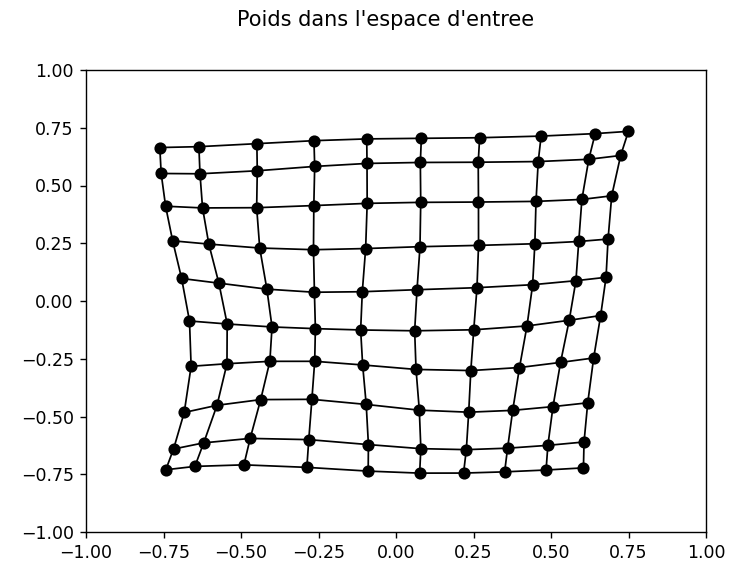

Exemple avec un σ à 10 : 

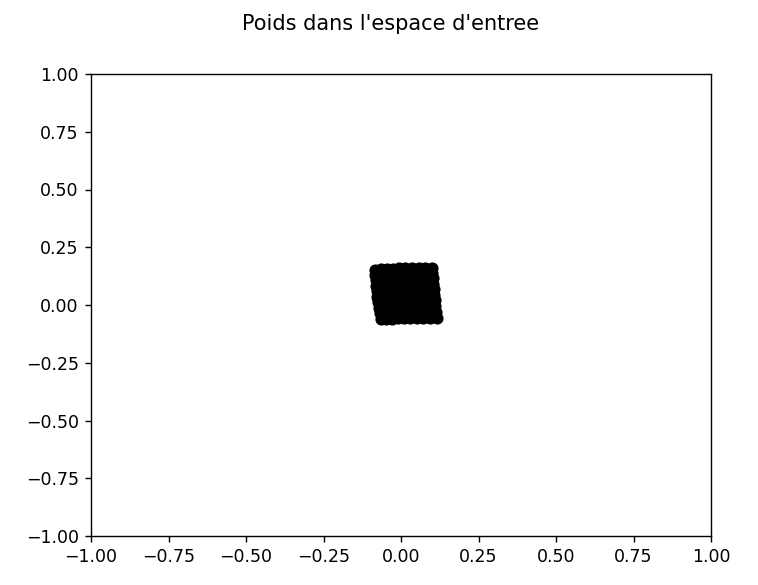

#### 3.3 Influence de la distribution d’entrée

**— Prenons le cas très simple d’une carte à 1 neurone qui reçoit deux entrées X1 et X2.**


**— Si X1 et X2 sont présentés autant de fois, vers quelle valeur convergera le vecteur du poids du neurone (en supposant un η faible - pour ne pas avoir à tenir compte de l’ordre de présentation des entrées - et suffisamment de présentations - pour négliger l’influence de l’initialisation des poids) ?**

Si X1 et X2 sont présentés autant de fois et que nous avons la même valeur d'apprentissage pour les 2, le vecteur du poids du neurone convergera vers la moyenne de X1 et X2.

**— Même question si X1 est présenté n fois plus que X2.**

Si X1 est présenté n fois plus que X2, le vecteur du poids du neurone convergera vers la moyenne pondérée de X1 et X2, avec X1 ayant un poids n fois supérieur.
Par exemple, si X1 est présent 3 fois plus que X2, il convergera vers la moyenne de (3X1+X2)/4.

**— En déduire comment vont se répartir les neurones en fonction de la densité des données dans le cas (normal) d’une carte à plusieurs neurones recevant des données d’une base d’apprentissage. Pour rappel, la mesure de quantification vectorielle permet de mesurer ce phénomène.**

Du coup, les neurones se répartiront là où les données sont plus concentrées étant donnée que plus on reçoit des données dans une zone donnée, plus les neurones convergeront vers cette zone.

### 4. Etude pratique

#### 4.3 Analyse de l’algorithme

**Pour réaliser l’étude pratique du comportement de l’algorithme, utilisez une démarche scientifique i.e. faites des hypothèses (en particulier en regard de votre étude théorique faite dans la section 3) et confrontez les aux résultats/données obtenus (qualitativement et quantitativement avec la mesure d’erreur de quantification vectorielle fourni et avec la mesure d’auto-organisation que vous avez proposé à la section 3.2). En particulier, vous étudierez l’influence des éléments suivants sur le fonctionnement de l’algorithme de Kohonen :**

**— taux d’apprentissage η**

**— largeur du voisinage σ**

**— nombre de pas de temps d’apprentissage N**

**— taille et forme de la carte (vous pouvez tester facilement des formes ’lignes’, ’carrées’ et ’rectangles’)**

**— jeu de données. En particulier créez vos propres jeux de données avec des données non uniformément distribuées pour étudier la répartition des poids des neurones.**

**— (Bonus) la topologie de la carte (par exemple, au lieu d’utiliser une grille carrée, utilisez une grille hexagonale), la fonction de voisinage, ...**

Dans l'algortihme donné, nous avons modifié les paramètres un par un pour mesurer leur influence dans les résultats, en essayant à chaque fois des valeurs extrêmes.

Taux d'apprentissage η :          
- valeur à 0 : les neurones initiales ne se déplacent pas
- valeur à 0.05 : les neurones se déplacent petit à petit jusqu'à la destination souhaitée
- valeur à 1 : les positions des neurones ne se stabilisent pas

Largeur du voisinage σ :       
- valeur à 0.01 : seulement quelques neurones se déplacent
- valeur à 10 : les neurones sont très resserés

Nombre de pas de temps d’apprentissage N :     
- valeur à 10 : les neurones n'ont pas le temps d'apprendre et de se déplacer
- valeur à 50000 : les neurones ont plus de temps pour apprendre, l'algorithme dure plus longtemps.

Taille et forme de la carte :     
- Déplacement des neurones selon la forme souhaitée
- Si l'on essaie de former deux formes séparées (par ex deux cercles séparés), les neurones construisent la liaison entre ces deux formes (voir image ci-dessous).

Jeux de données avec des données non uniformément distribuées :     
- Les zones contenant beaucoup de données seront beaucoup plus précises car ils auront beaucoup de neurones. Alors que les zones ayant moins de données seront moins précises. Il peut être intéressant de ne pas distribuer uniformément des données en fonction de la forme voulue.

Topologie de la carte :     
- Chaque neurones aura un nombre de voisins différent selon la topologie et changera donc la forme des grilles formées


---



Dans l'algortihme donné, nous avons modifié les paramètres un par un pour mesurer leur influence dans les résultats, en essayant à chaque fois des valeurs extrêmes et nous les avons comparé à un résultat témoin de base.

Le résultat témoin a été réalisé avec l'ensemble de données 1 :

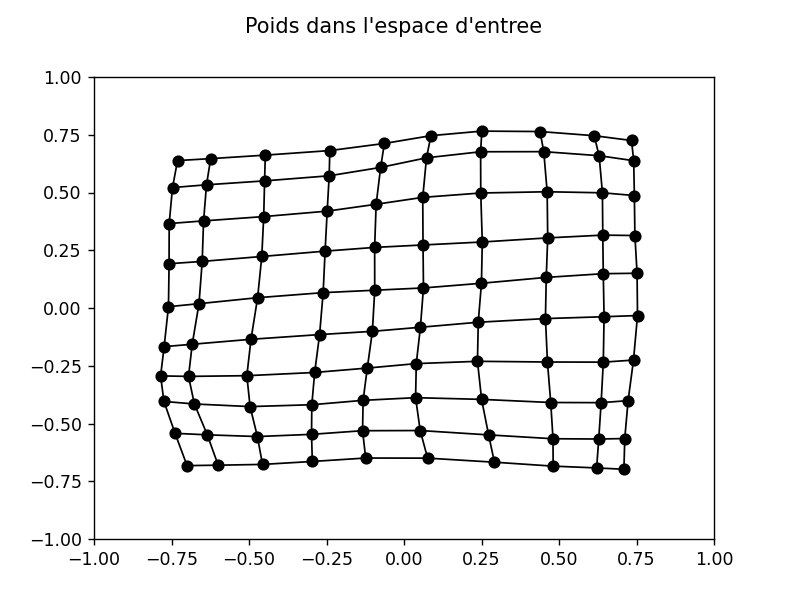

Variation du taux d'apprentissage η 



*   Taux d'apprentissage η à 0

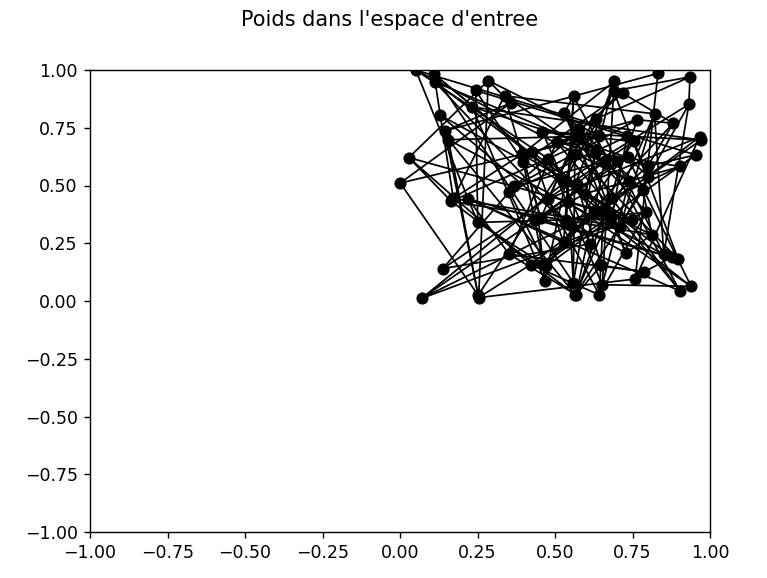

*   Taux d'apprentissage η à 1

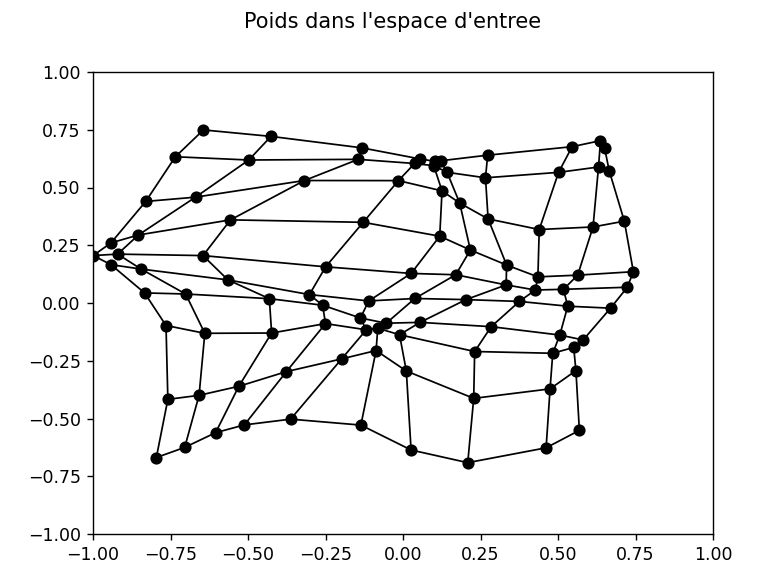

Variation de la largeur du voisinage σ :

*   Largeur de voisinage à 0.01

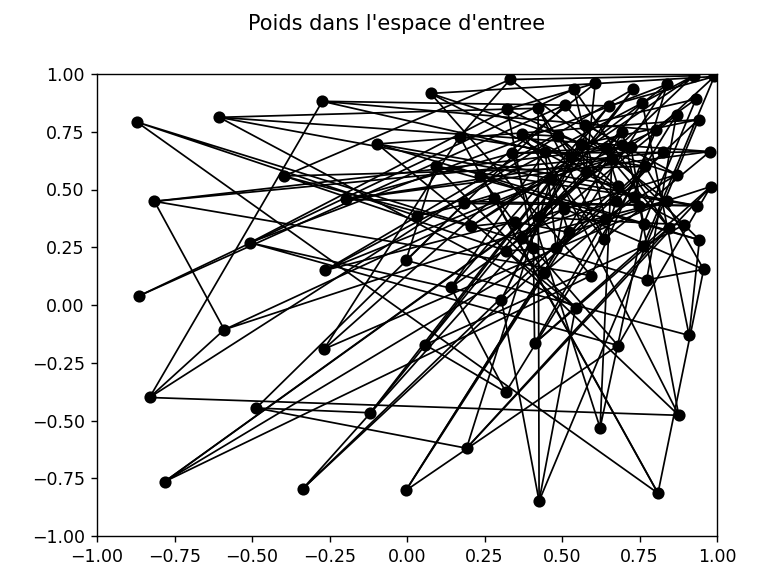

*   Largeur de voisinage à 10

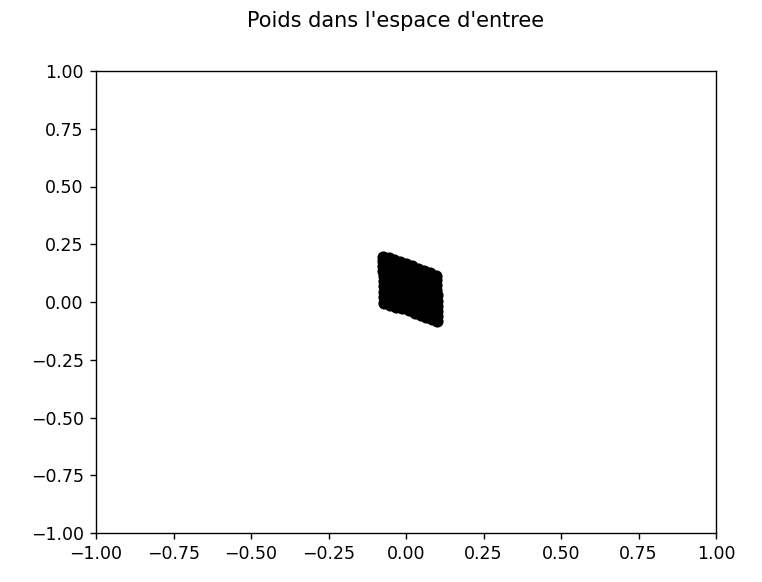

Variation du nombre de pas de temps d’apprentissage N

*   Nombre de pas de temps d’apprentissage N à 10

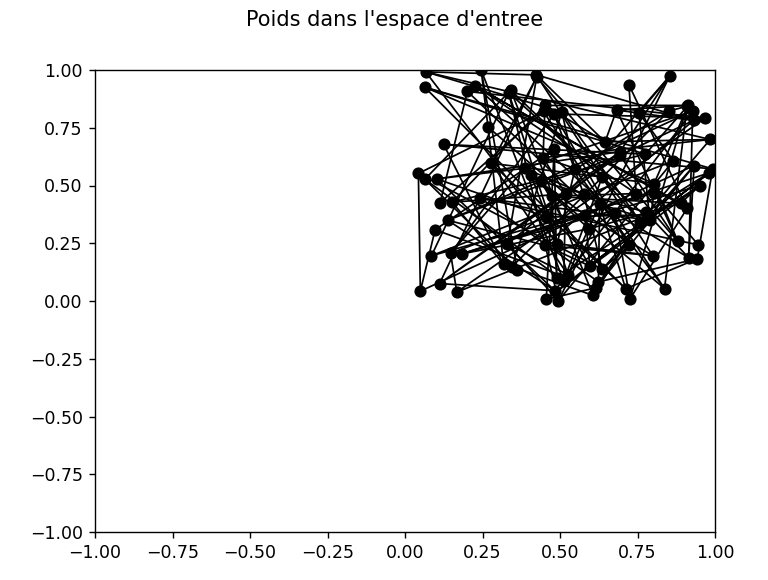

*   Nombre de pas de temps d’apprentissage N à 50000

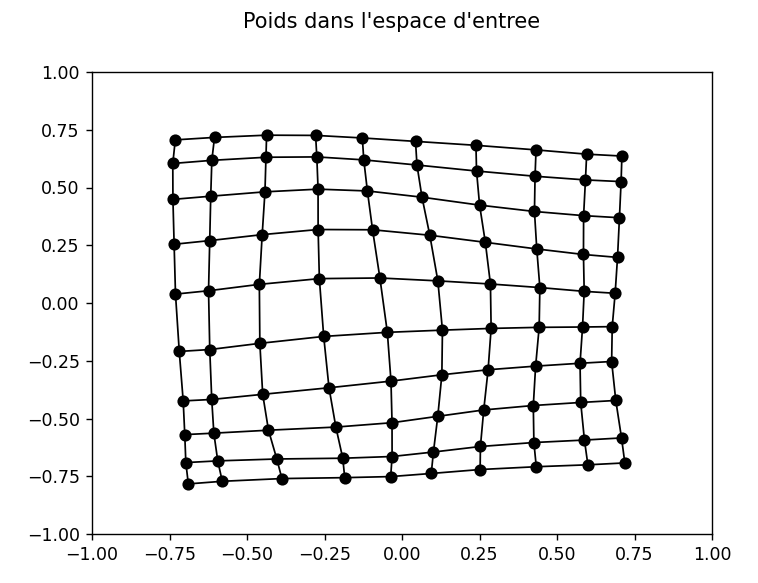

Ensemble de données 2 :

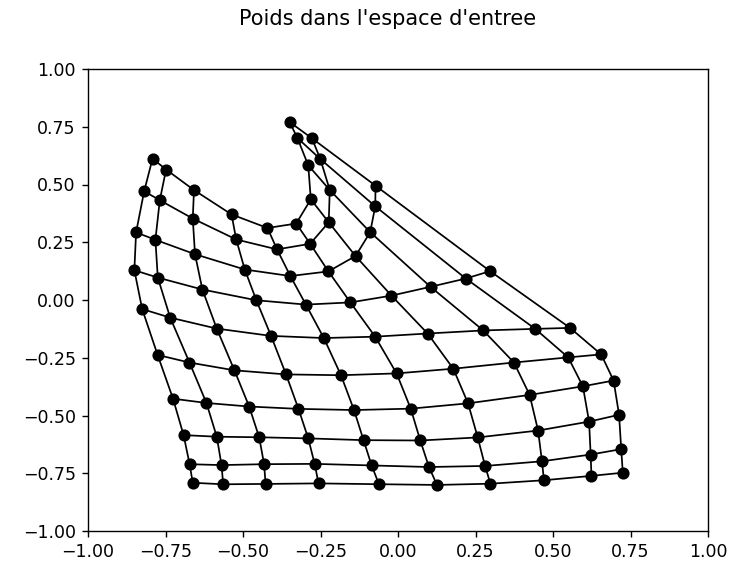

Ensemble de données 3 : 

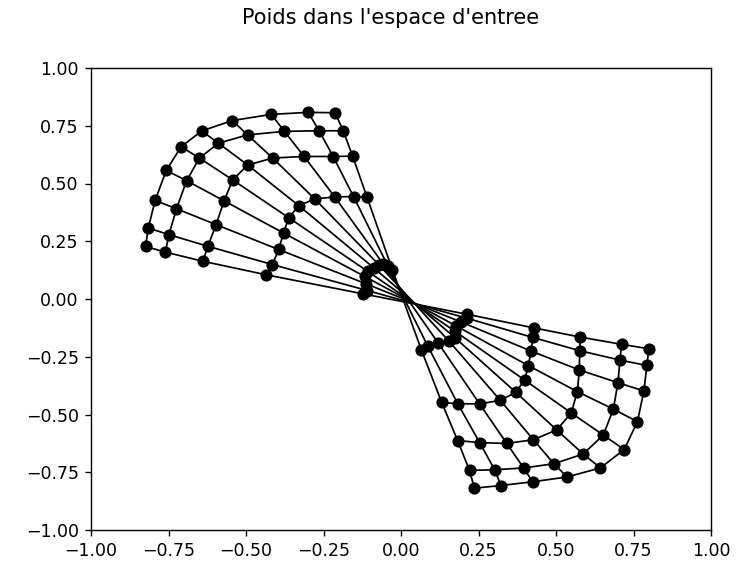

Ensemble de données test diagonale :

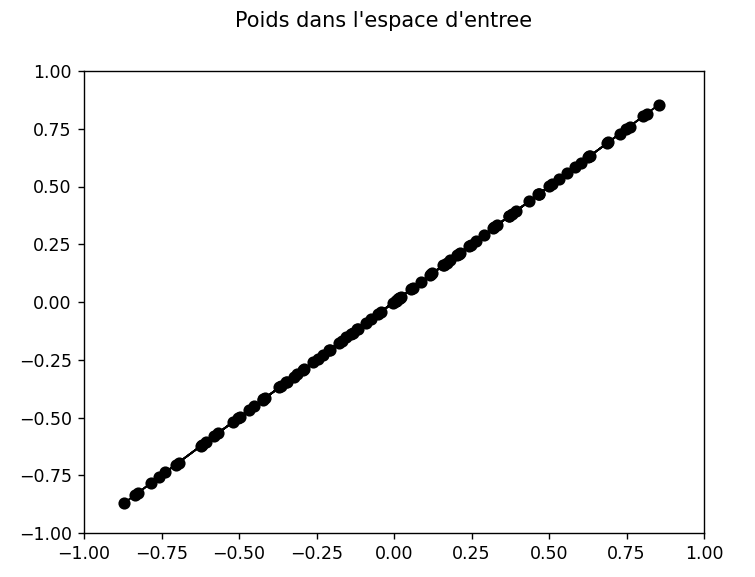

Ensemble de données test données non uniformes :

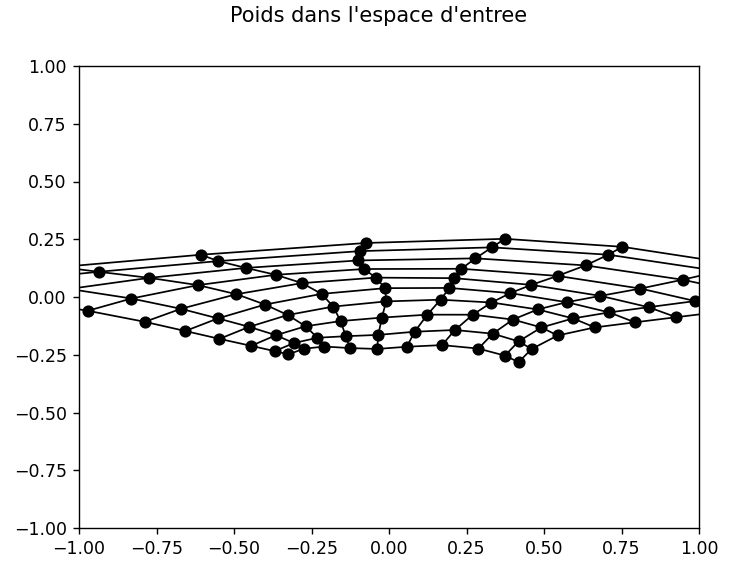

Simulation avec 2 cercles séparés :

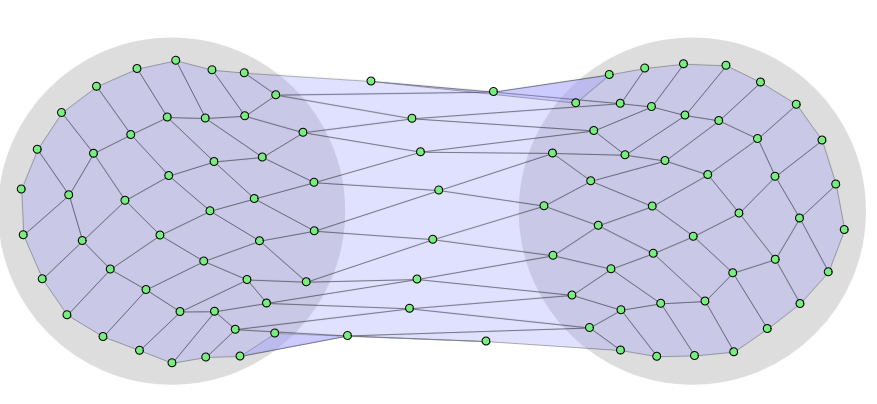

#### 4.4  Bras robotique

**— Une fois la carte apprise, comment faire pour prédire la position qu’aura le bras étant donné une position motrice ? Comment prédire la position motrice étant donné une position spatiale que l’on souhaite atteindre ? Expliquer/justifier le principe et implémentez le.**

Nous pouvons prédire la position qu'aura le bras pour une position motrice donnée en trouvant le neurone gagnant pour cette position motrice. Pour ce faire, on peut présenter la position motrice (θ1, θ2) à la carte et trouver le neurone dont les poids sont les plus proches de cette position motrice. Les poids de ce neurone gagnant représenteront la position prédite du bras (x1, x2) pour cette position motrice.

Nous pouvons faire de même pour prédire la position motrice étant donné une position spatiale que l’on souhaite atteindre : on présente la position spatiale (x1, x2) à la carte et on trouve le neurone dont les poids sont les plus proches de cette position spatiale. Les poids de ce neurone gagnant représenteront la position motrice prédite (θ1, θ2) pour atteindre cette position spatiale.

Principe :
On utilise une carte de Kohonen pour apprendre la relation entre la commande motrice (θ1, θ2) et la position de la main (x1, x2) en utilisant des exemples de quadruplets (θ1, θ2, x1, x2) générés. Une fois que la carte aura été entraînée avec suffisamment d’exemples, on peut l’utiliser pour prédire la position de la main pour une commande motrice donnée ou pour prédire la commande motrice nécessaire pour atteindre une position spatiale donnée.


**— De quel autre modèle vu en cours se rapproche cette méthode (apprentissage sur le quadruplet pour ensuite en retrouver une sous partie étant donnée l’autre) ? Quels auraient été les avantages et les inconvénients d’utiliser cette autre méthode ?**

Cette méthode se rapproche de la méthode du Perceptron multi-couches. Celui-ci fonctionne par couche, chaque neurone reçoit les sorties de tous les neurones de
la couche précèdente, ce qui permet de calculer chaque sortie en prenant en compte l'erreur des couches précèdentes. L'erreur finale peut donc être minimisé. Cette apprentissage des couches précèdentes est très longue et demande donc plus de temps. Il est difficile de retourner la valeur en entrée à partir de la valeur de sortie.

Elle permet de modéliser des relations complexes et non linéaires entre les entrées et les sorties mais il est nécessaire de choisir une architecture appropriée pour le réseau (nombre de couches cachées et nombre de neurones par couche) et des paramètres d’apprentissage appropriés (taux d’apprentissage, etc...). De plus, l’entraînement d’un Perceptron multi-couches peut être long et nécessiter beaucoup de données d’entraînement.


**— Si l’objectif était de prédire uniquement la position spatiale à partir de celle motrice, quel autre modèle du cours aurait-on pu utiliser ? Quels auraient été les avantages et les inconvénients ?**

On aurait pu utiliser le modèle du Perceptron car il prend en entrée les positions initiales des neurones et renvoit en sortie une estimation de la position finale. L'inconvénient est que celui-ci ne prend pas en compte l'organisation topologique des neurones, les angles et la distance entre les neurones.

**— On veut déplacer le bras d’une position motrice (θ1, θ2) à une nouvelle (θ01, θ02). En utilisant la carte apprise, comment prédire la suite des positions spatiales prise par la main ? On demande ici de pouvoir tracer grossièrement la trajectoire, pas forcément d’avoir la fonction exacte de toutes les positions prises. Expliquer/justifier le principe et implémentez le.**

On pourrait diviser le mouvement du bras en plusieurs étapes intermédiaires et calculer la position motrice intermédiaire à chaque étape pour le bras. Et comme la carte de Kohonen a appris à représenter la relation entre les commandes motrices et les positions de la main on pourrait prédire les positions spatiales intermédiaires de la main pour obtenir une approximation grossière de la trajectoire de la main.